<h2>Assignment 4 - 5</h2>
<p><strong>Importing the required libraries<strong></p>

In [24]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Creating the corpus for the dataset</h3>
<p>We maintain a list called corpus, where we store the execution traces as space separated string (while reading throught the files)</p>

In [242]:
path = pathlib.Path("./App Dataset/Dataset/B/sys")

In [3]:
#Reading through the files and storing the execution traces as a string in the list corpus
corpus = []
y = []
y_ = []
for i in path.iterdir():
    with open(i, encoding = "utf-8") as f:
        corpus.append(f.read().replace("\n", " "))
        y.append("B")
        y_.append("B")

In [4]:
path = pathlib.Path("./App Dataset/Dataset/M/sys")

In [5]:
#Reading through the files and storing the execution traces as a string in the list corpus
for i in path.iterdir():
    with open(i, encoding = "utf-8") as f:
        corpus.append(f.read().replace("\n", " "))
        y.append("M")
        y_.append("M")

In [6]:
len(corpus), len(y)

(5822, 5822)

<h2>Answer 1</h2>
<p><strong>Using the Term Frequency Inverse Document Frequency statistic and bag of words to reperesent the data</strong></p>

<h4>a) TF-IDF</h4>

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [9]:
print(X.shape)

(5822, 102)


In [10]:
from sklearn.utils import shuffle
x, y = shuffle(X, y, random_state = 42)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, plot_roc_curve

<p><strong>Importing the required libraries<strong></p>

In [14]:
from sklearn import svm

<h3>Using various Support Vector Machine classifiers with hyperparameter tuning</h3>

<h4>Linear Kernel</h4>

In [20]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["linear"], 
              "C" : [0.1, 1, 2, 10, 15]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch1 = svcClf.fit(X_train, y_train)

Wall time: 8.76 s


<h5>Best parameters</h5>

In [21]:
gridSearch1.best_params_

{'C': 15, 'kernel': 'linear'}

In [22]:
gridSearch1.score(X_test, y_test)

0.9261186264308012

<h5>Confusion matrix</h5>

In [27]:
predictions1 = gridSearch1.predict(X_test)
print(confusion_matrix(y_test, predictions1))

[[ 769   59]
 [  83 1011]]


<h4>RBF kernel</h4>

In [37]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["rbf"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch2 = svcClf.fit(X_train, y_train)

Wall time: 15.4 s


<h5>Best parameters</h5>

In [38]:
gridSearch2.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'rbf'}

In [39]:
gridSearch2.score(X_test, y_test)

0.9526534859521332

<h5>Confusion matrix</h5>

In [40]:
predictions2 = gridSearch2.predict(X_test)
print(confusion_matrix(y_test, predictions2))

[[ 771   57]
 [  34 1060]]


<h4>Polynomial Kernel</h4>

In [35]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["poly"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch3 = svcClf.fit(X_train, y_train)

Wall time: 21.3 s


<h5>Best parameters</h5>

In [36]:
gridSearch3.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'poly'}

In [41]:
gridSearch3.score(X_test, y_test)

0.9531737773152965

<h5>Confusion matrix</h5>

In [44]:
predictions3 = gridSearch3.predict(X_test)
print(confusion_matrix(y_test, predictions3))

[[ 771   57]
 [  33 1061]]


<h5>Precision Recall and F1 Score for the above three models</h5>

In [50]:
f1_1 = list(precision_recall_fscore_support(y_test, predictions1, average = "macro"))
f1_2 = list(precision_recall_fscore_support(y_test, predictions2, average = "macro"))
f1_3 = list(precision_recall_fscore_support(y_test, predictions3, average = "macro"))

In [53]:
P = [f1_1[0], f1_2[0], f1_3[0]]
R = [f1_1[1], f1_2[1], f1_3[1]]
F = [f1_1[2], f1_2[2], f1_3[2]]

In [54]:
d = {"Kernel" : ["Linear", "RBF", "Polynomial"], "Precision" : P, "Recall" : R, "F1 Score" : F}
df1 = pd.DataFrame.from_dict(d)

In [55]:
df1

,Kernel,Precision,Recall,F1 Score
0,Linear,0.923721,0.926438,0.924928
1,RBF,0.953367,0.950040,0.951558
2,Polynomial,0.953986,0.950497,0.952083


<h4>ROC curves</h4>

Text(0.5, 1.0, 'linear kernel')

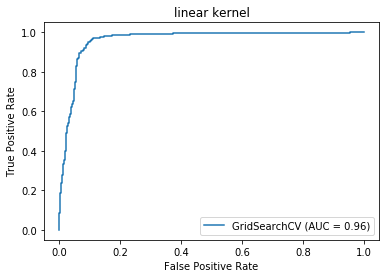

In [251]:
plot_roc_curve(gridSearch1, X_test, y_test)
plt.title("linear kernel")

Text(0.5, 1.0, 'rbf kernel')

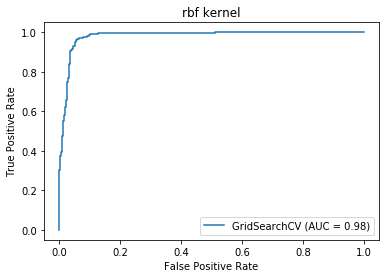

In [252]:
plot_roc_curve(gridSearch2, X_test, y_test)
plt.title("rbf kernel")

Text(0.5, 1.0, 'poly kernel')

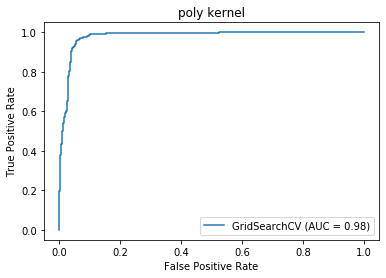

In [254]:
plot_roc_curve(gridSearch3, X_test, y_test)
plt.title("poly kernel")

<h4>b) Bag of words</h4>

In [258]:
from sklearn.feature_extraction.text import CountVectorizer

In [259]:
vectorizer1 = CountVectorizer()

In [260]:
x = vectorizer.fit_transform(corpus)

In [261]:
x, y = shuffle(x, y, random_state = 42)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<h4>Linear kernel</h4>

In [263]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["linear"], 
              "C" : [0.1, 1, 2, 10, 15]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch1 = svcClf.fit(X_train, y_train)

AttributeError: 'SVC' object has no attribute 'SVC'

In [264]:
gridSearch1.best_params_

{'C': 15, 'kernel': 'linear'}

In [265]:
gridSearch1.score(X_test, y_test)

0.5062434963579605

In [266]:
predictions1 = gridSearch1.predict(X_test)
print(confusion_matrix(y_test, predictions1))

[[349 454]
 [495 624]]


<h4>RBF kernel</h4>

In [267]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["rbf"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch2 = svcClf.fit(X_train, y_train)

AttributeError: 'SVC' object has no attribute 'SVC'

In [268]:
gridSearch2.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'poly'}

In [269]:
gridSearch2.score(X_test, y_test)

0.5098855359001041

In [270]:
predictions2 = gridSearch2.predict(X_test)
print(confusion_matrix(y_test, predictions2))

[[329 474]
 [468 651]]


<h4>Polynomial kernel</h4>

In [271]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["poly"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch3 = svcClf.fit(X_train, y_train)

AttributeError: 'SVC' object has no attribute 'SVC'

In [272]:
gridSearch3.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'rbf'}

In [273]:
gridSearch3.score(X_test, y_test)

0.5088449531737773

In [274]:
predictions3 = gridSearch3.predict(X_test)
print(confusion_matrix(y_test, predictions3))

[[329 474]
 [470 649]]


<h5>Precision, Recall and F1 scores<h5>

In [275]:
f1_1 = list(precision_recall_fscore_support(y_test, predictions1, average = "macro"))
f1_2 = list(precision_recall_fscore_support(y_test, predictions2, average = "macro"))
f1_3 = list(precision_recall_fscore_support(y_test, predictions3, average = "macro"))

In [276]:
P = [f1_1[0], f1_2[0], f1_3[0]]
R = [f1_1[1], f1_2[1], f1_3[1]]
F = [f1_1[2], f1_2[2], f1_3[2]]

In [277]:
d = {"Kernel" : ["Linear", "RBF", "Polynomial"], "Precision" : P, "Recall" : R, "F1 Score" : F}
df1 = pd.DataFrame.from_dict(d)

In [278]:
df1

,Kernel,Precision,Recall,F1 Score
0,Linear,0.496178,0.496130,0.495924
1,RBF,0.495732,0.495742,0.495732
2,Polynomial,0.494841,0.494848,0.494842


<h4>ROC plots</h4>

Text(0.5, 1.0, 'linear kernel')

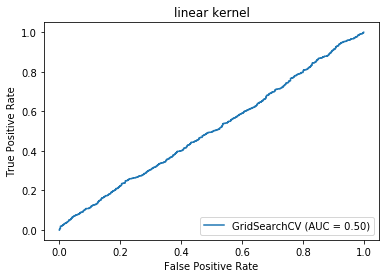

In [279]:
plot_roc_curve(gridSearch1, X_test, y_test)
plt.title("linear kernel")

Text(0.5, 1.0, 'rbf kernel')

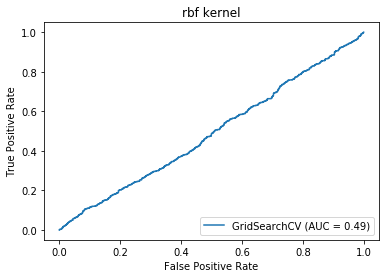

In [280]:
plot_roc_curve(gridSearch2, X_test, y_test)
plt.title("rbf kernel")

Text(0.5, 1.0, 'poly kernel')

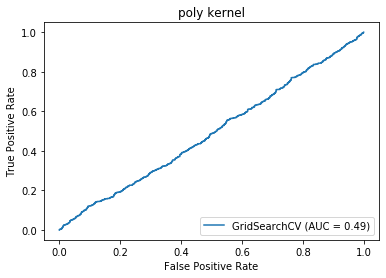

In [281]:
plot_roc_curve(gridSearch3, X_test, y_test)
plt.title("poly kernel")

<h3>As we can see that TFIDF feature representation is better than bag of words representation</h3>

<h2>Answer 2</h2>
<p>For question 2, we will again be using 2 sequence and 3 sequence calls as our data and trainging the SVM models</p>
<p><strong>2 - sequence calls</strong><p>

In [282]:
corpus_ = []
y = []

In [97]:
path = pathlib.Path("./App Dataset/Dataset/B/sys")

In [98]:
#Reading through the files and storing the execution traces as a string in the list corpus
for i in path.iterdir():
    s = ""
    with open(i) as f:
      lines = list(map(lambda x: x.strip("'\n'"),f.readlines()))
      for j in range(len(lines)-1):
        s += lines[j] + "-" + lines[j+1] + " "
    corpus_.append(s.strip())
    y.append("B")

In [99]:
path = pathlib.Path("./App Dataset/Dataset/M/sys")
#Reading through the files and storing the execution traces as a string in the list corpus
for i in path.iterdir():
    s = ""
    with open(i) as f:
      lines = list(map(lambda x: x.strip("'\n'"),f.readlines()))
      for j in range(len(lines)-1):
        s += lines[j] + "-" + lines[j+1] + " "
    corpus_.append(s.strip())
    y.append("M")

In [100]:
len(corpus_), len(y)

(5822, 5822)

<p><strong>Using the Term Frequency Inverse Document Frequency statistic to reperesent the data</strong></p>

In [102]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_)

In [103]:
X.shape

(5822, 102)

In [104]:
x, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<h4>Using the various svm kernels and computing their F1 scores</h4>

In [105]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["linear"], 
              "C" : [0.1, 1, 2, 10, 15]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch1 = svcClf.fit(X_train, y_train)

Wall time: 5.62 s


In [106]:
gridSearch1.best_params_

{'C': 15, 'kernel': 'linear'}

In [107]:
gridSearch1.score(X_test, y_test)

0.9235171696149844

In [108]:
predictions1 = gridSearch1.predict(X_test)
print(confusion_matrix(y_test, predictions1))

[[ 763   65]
 [  82 1012]]


In [113]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["poly"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch2 = svcClf.fit(X_train, y_train)

Wall time: 20.9 s


In [114]:
gridSearch2.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'poly'}

In [115]:
gridSearch2.score(X_test, y_test)

0.9521331945889698

In [117]:
predictions2 = gridSearch2.predict(X_test)
print(confusion_matrix(y_test, predictions2))

[[ 769   59]
 [  33 1061]]


In [118]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["rbf"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch3 = svcClf.fit(X_train, y_train)

Wall time: 14.8 s


In [119]:
gridSearch3.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'rbf'}

In [120]:
gridSearch3.score(X_test, y_test)

0.9516129032258065

In [121]:
predictions3 = gridSearch3.predict(X_test)
print(confusion_matrix(y_test, predictions3))

[[ 769   59]
 [  34 1060]]


<h4>F1 scores</h4>

In [122]:
f1_1 = list(precision_recall_fscore_support(y_test, predictions1, average = "macro"))
f1_2 = list(precision_recall_fscore_support(y_test, predictions2, average = "macro"))
f1_3 = list(precision_recall_fscore_support(y_test, predictions3, average = "macro"))

In [124]:
P = [f1_1[0], f1_2[0], f1_3[0]]
R = [f1_1[1], f1_2[1], f1_3[1]]
F = [f1_1[2], f1_2[2], f1_3[2]]

In [125]:
d = {"Kernel" : ["Linear", "RBF", "Polynomial"], "Precision" : P, "Recall" : R, "F1 Score" : F}
df1 = pd.DataFrame.from_dict(d)
df1

,Kernel,Precision,Recall,F1 Score
0,Linear,0.921303,0.923272,0.922212
1,RBF,0.953087,0.949290,0.951002
2,Polynomial,0.952467,0.948833,0.950478


<h4>ROC plots</h4>

Text(0.5, 1.0, 'linear kernel')

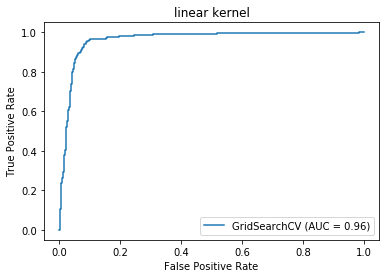

In [128]:
plot_roc_curve(gridSearch1, X_test, y_test)
plt.title("linear kernel")

Text(0.5, 1.0, 'poly kernel')

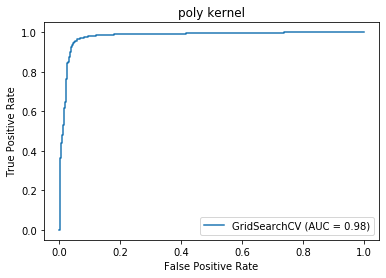

In [130]:
plot_roc_curve(gridSearch2, X_test, y_test)
plt.title("poly kernel")

Text(0.5, 1.0, 'rbf kernel')

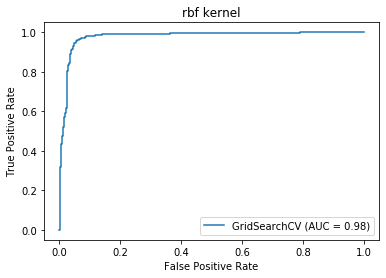

In [131]:
plot_roc_curve(gridSearch3, X_test, y_test)
plt.title("rbf kernel")

<p><strong>3 - sequence calls</strong><p>

In [132]:
#Reading through the files and storing the execution traces as a string in the list corpus
corpus__ = []
y = []
path = pathlib.Path("./App Dataset/Dataset/B/sys")
for i in path.iterdir():
    s = ""
    with open(i) as f:
      l = list(map(lambda x: x.strip("'\n'"),f.readlines()))
      for j in range(len(l)-2):
        s += l[j] + "-" + l[j+1] + "-" + l[j+2] + " "
    corpus__.append(s.strip())
    y.append("B")

In [133]:
path = pathlib.Path("./App Dataset/Dataset/M/sys")
#Reading through the files and storing the execution traces as a string in the list corpus
for i in path.iterdir():
    s = ""
    with open(i) as f:
      l = list(map(lambda x: x.strip("'\n'"),f.readlines()))
      for j in range(len(l)-2):
        s += l[j] + "-" + l[j+1] + "-" + l[j+2] + " "
    corpus__.append(s.strip())
    y.append("M")

In [134]:
len(corpus_), len(y)

(5822, 5822)

In [135]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_)
print(X.shape)

(5822, 102)


In [136]:
x, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<h4>Using various svm kernels</h4>

In [137]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["linear"], 
              "C" : [0.1, 1, 2, 10, 15]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch1 = svcClf.fit(X_train, y_train)

Wall time: 12.8 s


In [138]:
gridSearch1.best_params_

{'C': 15, 'kernel': 'linear'}

In [139]:
gridSearch1.score(X_test, y_test)

0.9235171696149844

In [140]:
predictions1 = gridSearch1.predict(X_test)
print(confusion_matrix(y_test, predictions1))

[[ 763   65]
 [  82 1012]]


In [141]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["poly"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch2 = svcClf.fit(X_train, y_train)

Wall time: 35.8 s


In [142]:
gridSearch2.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'poly'}

In [143]:
gridSearch2.score(X_test, y_test)

0.9521331945889698

In [144]:
predictions2 = gridSearch2.predict(X_test)
print(confusion_matrix(y_test, predictions2))

[[ 769   59]
 [  33 1061]]


In [146]:
%%time
svc = svm.SVC()
parameter = [{"kernel" : ["rbf"], 
              "C" : [0.1, 1, 2, 10, 15], 
              "gamma" : [0.1, 0.3, 0.5, 0.9]}]
svcClf = GridSearchCV(svc, parameter, n_jobs = -1)
gridSearch3 = svcClf.fit(X_train, y_train)

Wall time: 24.1 s


In [148]:
gridSearch3.best_params_

{'C': 15, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
gridSearch3.score(X_test, y_test)

In [149]:
predictions3 = gridSearch2.predict(X_test)
print(confusion_matrix(y_test, predictions3))

[[ 769   59]
 [  33 1061]]


<h4>F1 scores</h4>

In [150]:
f1_1 = list(precision_recall_fscore_support(y_test, predictions1, average = "macro"))
f1_2 = list(precision_recall_fscore_support(y_test, predictions2, average = "macro"))
f1_3 = list(precision_recall_fscore_support(y_test, predictions3, average = "macro"))

In [151]:
P = [f1_1[0], f1_2[0], f1_3[0]]
R = [f1_1[1], f1_2[1], f1_3[1]]
F = [f1_1[2], f1_2[2], f1_3[2]]

In [152]:
d = {"Kernel" : ["Linear", "RBF", "Polynomial"], "Precision" : P, "Recall" : R, "F1 Score" : F}
df1 = pd.DataFrame.from_dict(d)
df1

,Kernel,Precision,Recall,F1 Score
0,Linear,0.921303,0.923272,0.922212
1,RBF,0.953087,0.949290,0.951002
2,Polynomial,0.953087,0.949290,0.951002


<h4>ROC plots</h4>

Text(0.5, 1.0, 'linear kernel')

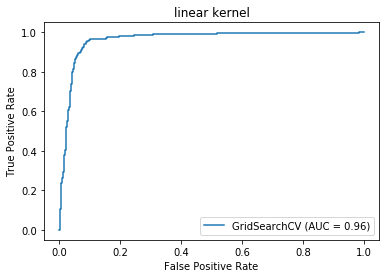

In [153]:
plot_roc_curve(gridSearch1, X_test, y_test)
plt.title("linear kernel")

Text(0.5, 1.0, 'poly kernel')

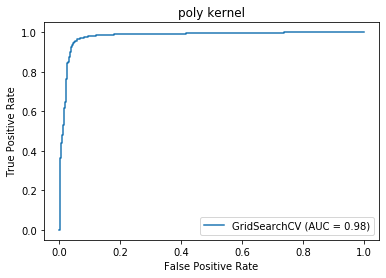

In [154]:
plot_roc_curve(gridSearch2, X_test, y_test)
plt.title("poly kernel")

Text(0.5, 1.0, 'rbf kernel')

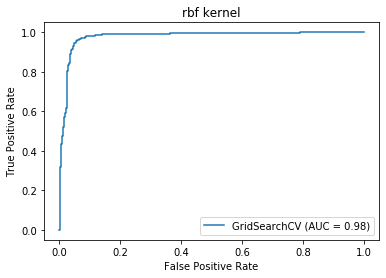

In [155]:
plot_roc_curve(gridSearch3, X_test, y_test)
plt.title("rbf kernel")

<h2>Answer 3</h2>
<p>As we have seen that polynomial kernel has higher F1 measure for all the three different data representation models, we will use this kernel for the appropriate feature selection</p>

In [156]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import precision_recall_fscore_support

In [157]:
vectorizer = TfidfVectorizer()
X_ = vectorizer.fit_transform(corpus_)

In [158]:
x, y = shuffle(X_, y_, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [159]:
X_train.shape, X_test.shape

((3900, 102), (1922, 102))

In [161]:
svm = svm.SVC(kernel='poly', C = 10, gamma  = 0.9)
f1 = {}
#Looping throught the dataset, taking 10%, 20%......, 30% of the data at a time and evaluating the performance
for i in range(10, 110, 10):
    selector = SelectPercentile(f_classif, percentile = i)
    selector.fit(X_train, y_train)
    X_train_ = selector.transform(X_train)
    X_test_  = selector.transform(X_test)
    svm.fit(X_train_, y_train)
    predictions = svm.predict(X_test_)
    f1[i] = precision_recall_fscore_support(y_test, predictions, average = "macro")

D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Users\aryam\anacond

In [162]:
f1

{10: (0.8781866313126061, 0.8854511653375019, 0.8785526900651054, None),
 20: (0.906558758952376, 0.9121062183716186, 0.9084172406540827, None),
 30: (0.9384158789331203, 0.9362321048494644, 0.9372548802620513, None),
 40: (0.9398047007054937, 0.9380436990523628, 0.9388785543449376, None),
 50: (0.9420664460987042, 0.9389743351968135, 0.9403889076579695, None),
 60: (0.9442031982354563, 0.9410961414478622, 0.9425178752416135, None),
 70: (0.9442031982354563, 0.9410961414478622, 0.9425178752416135, None),
 80: (0.9437485055911743, 0.9404922767135628, 0.9419763621352126, None),
 90: (0.9437485055911743, 0.9404922767135628, 0.9419763621352126, None),
 100: (0.9535360583691408, 0.9498935785002076, 0.9515426789416421, None)}

In [163]:
vectorizer = TfidfVectorizer()
X_ = vectorizer.fit_transform(corpus__)
x, y = shuffle(X_, y_, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((3900, 102), (1922, 102))

In [166]:
from sklearn import svm

In [167]:
svm = svm.SVC(kernel='poly', C = 10, gamma = 0.9)
f1 = {}
#Looping throught the dataset, taking 10%, 20%......, 30% of the data at a time and evaluating the performance
for i in range(10, 110, 10):
    selector = SelectPercentile(f_classif, percentile = i)
    selector.fit(X_train, y_train)
    X_train_ = selector.transform(X_train)
    X_test_  = selector.transform(X_test)
    svm.fit(X_train_, y_train)
    predictions = svm.predict(X_test_)
    f1[i] = precision_recall_fscore_support(y_test, predictions, average = "macro")

D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
D:\Users\aryam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\Users\aryam\anacond

In [ ]:
f1

<p><strong>We see that using 100% (or all the features in the dataset) results in the highest F1 score</strong></p>

<h2>Answer 4</h2>

In [169]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

In [172]:
x = vectorizer.fit_transform(corpus_)

<h4>Using K-Means clustering technique</h4>

In [188]:
predictions1 = {}
for i in range (2, 11):
    km = KMeans(n_clusters = i, random_state = 10)
    predictions1[i] = km.fit_predict(x)

In [189]:
predictions1

{2: array([1, 1, 1, ..., 1, 1, 1]),
 3: array([1, 1, 1, ..., 1, 0, 0]),
 4: array([2, 2, 2, ..., 2, 1, 1]),
 5: array([2, 2, 2, ..., 1, 4, 4]),
 6: array([1, 5, 1, ..., 2, 0, 0]),
 7: array([1, 5, 1, ..., 3, 2, 2]),
 8: array([3, 0, 3, ..., 5, 1, 1]),
 9: array([4, 5, 4, ..., 2, 0, 0]),
 10: array([1, 3, 1, ..., 8, 6, 6])}

<h4>Using Agglomerative clustering technique</h4>

In [190]:
predictions2 = {}
for i in range (2, 11):
    agg = AgglomerativeClustering(n_clusters = i)
    predictions2[i] = agg.fit_predict(x.toarray())

In [191]:
predictions2

{2: array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 3: array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 4: array([0, 0, 0, ..., 0, 3, 3], dtype=int64),
 5: array([0, 0, 0, ..., 0, 3, 3], dtype=int64),
 6: array([3, 2, 3, ..., 3, 1, 1], dtype=int64),
 7: array([3, 6, 3, ..., 3, 1, 1], dtype=int64),
 8: array([1, 6, 1, ..., 1, 0, 0], dtype=int64),
 9: array([0, 6, 0, ..., 0, 4, 4], dtype=int64),
 10: array([9, 6, 9, ..., 4, 1, 1], dtype=int64)}

<h4>Iterating over the clusters from 2 to 20 and checking which cluster number gives best results</h4>

In [239]:
km = KMeans()
parameters = [{"n_clusters" : range(2, 21)}]
kmcluster = GridSearchCV(km, parameters)
g = kmcluster.fit(x.toarray())

In [240]:
g.best_params_

{'n_clusters': 20}

<h4>We can see that the more the cluster number, the better is the performance of the model</h4>